   # Creep Data Analysis 

## Importing creep data as comma separated value(csv) file

In [138]:
import numpy as np
import pandas as pd
creep=pd.read_csv('creepdata.csv')

In [168]:
print(creep.head())

   Temperature  Load  Time Period(Hour)  Time Period(Year)      CEEQ Category
0          500   110               0.00           0.000000  0.000000        A
1          500   110               0.05           0.000006  0.000000        A
2          500   110               0.10           0.000011  0.000015        A
3          500   110               0.15           0.000017  0.000029        A
4          500   110               0.20           0.000023  0.000044        A


# Analysing the Data Set 

In [140]:
creep.shape

(1240, 6)

### *The creep data set has 1240 rows and 6 columns*

In [141]:
creep.isnull().sum()

Temperature          0
Load                 0
Time Period(Hour)    0
Time Period(Year)    0
CEEQ                 0
Category             0
dtype: int64

### *There is no missing  values in the data set*

In [143]:
creep.Category.describe()

count     1240
unique       6
top          A
freq       912
Name: Category, dtype: object

The highest simulated creep value is 1.21 mm for the node shows the maximum creep value at a temperature of 500 degree Celcius, 110 MPa load when the simulation is run for 262800 hours.   

The whole data set is divided into 6 categories according to creep values. 
CEEQ(mm) Category
0.0-.2        A
.2-.4         B
.4-.6         C
.6-.8         D
.8-1.0        E
>1.0          F

In [144]:
creep.Category.value_counts()

A    912
B    136
C     96
D     58
E     32
F      6
Name: Category, dtype: int64

In [145]:
creep.sort_values('CEEQ', ascending=False).head(10)

,Temperature,Load,Time Period(Hour),Time Period(Year),CEEQ,Category
52,500,110,262800.0,30.000000,1.210420,F
51,500,110,246570.0,28.147260,1.191960,F
50,500,110,214567.0,24.493950,1.153700,F
49,500,110,182565.0,20.840753,1.111160,F
48,500,110,150562.0,17.187443,1.063000,F
47,500,110,127900.0,14.600457,1.023460,F
314,400,110,262800.0,30.000000,0.995481,E
46,500,110,112793.0,12.875913,0.993444,E
565,300,110,262800.0,30.000000,0.977253,E
313,400,110,239107.0,27.295320,0.973326,E


### *Let's see how many CEEQ has their values greater than 1mm*

In [170]:
severe_creep=creep[(creep.CEEQ)>1]
print(severe_creep)

    Temperature  Load  Time Period(Hour)  Time Period(Year)     CEEQ Category
47          500   110           127900.0          14.600457  1.02346        F
48          500   110           150562.0          17.187443  1.06300        F
49          500   110           182565.0          20.840753  1.11116        F
50          500   110           214567.0          24.493950  1.15370        F
51          500   110           246570.0          28.147260  1.19196        F
52          500   110           262800.0          30.000000  1.21042        F


### *So there are six values and let's put them into a graph to see the relation with increasing time period*

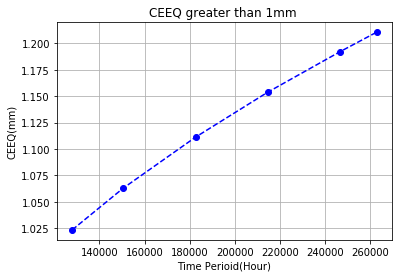

In [171]:
import matplotlib.pyplot as plt
a=severe_creep['Time Period(Hour)']
b=severe_creep['CEEQ']
plt.plot(a,b, color='b', linestyle='--', marker='o')
plt.xlabel('Time Perioid(Hour)')
plt.ylabel('CEEQ(mm)')
plt.title('CEEQ greater than 1mm ')
plt.grid('True')


### *We can filter data by multiple criteria. For example, here we see CEEQ values greater than .8mm at 400 degree Celcius*

In [172]:
creep[(creep.CEEQ>.8)&(creep.Temperature==400)]

,Temperature,Load,Time Period(Hour),Time Period(Year),CEEQ,Category
309,400,110,121484.0,13.868037,0.830312,E
310,400,110,147623.0,16.851941,0.869283,E
311,400,110,173761.0,19.835731,0.903361,E
312,400,110,199899.0,22.819521,0.933747,E
313,400,110,239107.0,27.295320,0.973326,E
314,400,110,262800.0,30.000000,0.995481,E


## Cross Validation: Parameter Tuning

In [94]:
feature=creep[['Temperature','Load','Time Period(Hour)']]

In [150]:
target=creep['Category'].map({'A':0,'B':1,'C':2, 'D':3,'E':4,'F':5})

In [151]:
X=feature
y=target

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [153]:
k_range=list(range(1,31))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores) 

[0.8143923822284712, 0.8063742590840283, 0.7949414677182423, 0.7763450459628735, 0.7706576835394561, 0.7674263628576032, 0.7641996170205049, 0.7560944822149229, 0.7479380038340622, 0.7462851112720787, 0.7430454674536772, 0.7325132360487184, 0.7332935639175708, 0.7228517207940798, 0.7204781670750715, 0.7196575450694324, 0.7261162619067684, 0.7237301097625632, 0.724482741919826, 0.7261691544687519, 0.7270291207366861, 0.7301384328991121, 0.7236726423558253, 0.7277774776053008, 0.7390629402797351, 0.7350109975922432, 0.733404223442399, 0.7390503418545382, 0.7398445175791856, 0.7422183708543004]


In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cross-validated accuracy')

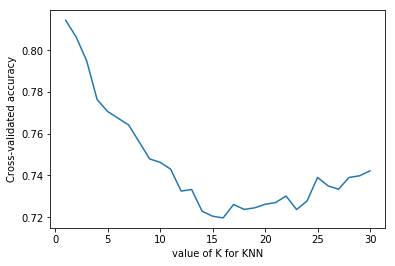

In [155]:
plt.plot(k_range,k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validated accuracy')

## Model selection


In [101]:
knn=KNeighborsClassifier(n_neighbors=1)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.8143923822284712


In [102]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.7194758698381779


## Training a machine learning model with scikit-learn

In [135]:
knn=KNeighborsClassifier(n_neighbors=1)
print(knn)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Predicting some creep strain values as output of given Temperature(C), Load(MPa) and Time Period(Hour)

In [136]:
print(knn.predict([[500,110,262800]]))
print(knn.predict([[500,100,262800]]))
print(knn.predict([[500,90,262800]]))
print(knn.predict([[500,80,262800]]))
print(knn.predict([[500,70,262800]]))
print(knn.predict([[500,60,262800]]))
print(knn.predict([[500,50,262800]]))

[5]
[4]
[3]
[1]
[1]
[0]
[0]


### Comparing the simulated values with the knn predicted values

In [167]:
d = {'110 MPa' : pd.Series([1.21,'F',5,5], index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '100 MPa' : pd.Series([.8843,'E',4,4],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '90 MPa' : pd.Series([.6176,'D',3,3],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '80 MPa' : pd.Series([.3912,'B',1,1],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '70 MPa' : pd.Series([.2023,'B',1,1],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '60 MPa' : pd.Series([.0719,'A',0,0],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '50 MPa' : pd.Series([.0146,'A',0,0],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values'])}
df=pd.DataFrame(d)
print(df)

                     110 MPa 100 MPa  90 MPa  80 MPa  70 MPa  60 MPa  50 MPa
CEEQ(mm)                1.21  0.8843  0.6176  0.3912  0.2023  0.0719  0.0146
Category                   F       E       D       B       B       A       A
Assinged Values            5       4       3       1       1       0       0
Predicted knn values       5       4       3       1       1       0       0
